## Importing libraries

In [1]:
import pandas as pd

import numpy as np

from collections import Counter as c

import seaborn as sns

import matplotlib.pyplot as plt

import missingno as msno

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

import pickle

from sklearn.linear_model import LinearRegression

## Read the Dataset

In [3]:
data = pd.read_csv('C:/Users/JYOTHSNA/Downloads/CO2-Emission-of-Cars-main/Dataset/Sample.csv')

In [4]:
data.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


## Checking for Null Values

In [5]:
data.isnull().any()

MODEL                False
MAKE                 False
MODEL.1              False
VEHICLE CLASS        False
ENGINE_SIZE          False
CYLINDERS            False
TRANSMISSION         False
FUEL                 False
FUEL_CONSUMPTION*    False
Unnamed: 9           False
Unnamed: 10          False
Unnamed: 11          False
CO2_EMISSIONS        False
dtype: bool

## Dropping MODEL Column

In [6]:
data.drop('MODEL', axis = 1, inplace = True)

## Renaming the Columns

In [7]:
data.columns

Index(['MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION*', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'CO2_EMISSIONS'],
      dtype='object')

In [8]:
data.columns = ['Make', 'MODEL.1', 'Vehicle_Class', 'Engine_Size', 'Cylinders', 'Transmission', 'Fuel_type', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100km)', 'Fuel_Consumption_Comb(msg)', 'CO2_Emissions']

In [9]:
data.columns

Index(['Make', 'MODEL.1', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100km)',
       'Fuel_Consumption_Comb(msg)', 'CO2_Emissions'],
      dtype='object')

## Understanding Data type and Summary of features

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 12 columns):
Make                              679 non-null object
MODEL.1                           679 non-null object
Vehicle_Class                     679 non-null object
Engine_Size                       679 non-null float64
Cylinders                         679 non-null int64
Transmission                      679 non-null object
Fuel_type                         679 non-null object
Fuel_Consumption_City             679 non-null float64
Fuel_Consumption_Hwy              679 non-null float64
Fuel_Consumption_Comb(L/100km)    679 non-null float64
Fuel_Consumption_Comb(msg)        679 non-null int64
CO2_Emissions                     679 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 63.7+ KB


In [11]:
data.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb(L/100km),Fuel_Consumption_Comb(msg),CO2_Emissions
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,3.252577,5.798233,14.591900,10.613844,12.802798,23.107511,293.656848
std,1.203751,1.531073,3.025654,2.357724,2.685590,5.308083,60.372456
min,1.000000,3.000000,4.900000,4.000000,4.500000,14.000000,104.000000
25%,2.200000,4.000000,12.700000,9.000000,11.000000,19.000000,253.000000
50%,3.000000,6.000000,14.300000,10.100000,12.300000,23.000000,283.000000
75%,4.200000,6.000000,16.650000,12.500000,14.850000,26.000000,340.000000
max,8.000000,12.000000,23.200000,18.000000,20.800000,63.000000,478.000000


## Observing Target, Numerical and Categorical Columns

In [12]:
np.unique(data.dtypes, return_counts = True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([3, 4, 5], dtype=int64))

### Categorical Columns

In [13]:
cat = data.dtypes[data.dtypes == 'O'].index.values

In [14]:
cat

array(['Make', 'MODEL.1', 'Vehicle_Class', 'Transmission', 'Fuel_type'],
      dtype=object)

In [15]:
for i in cat:
    print("Column :", i)
    print('count of classes :', data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : Make
count of classes : 34
Counter({'FORD': 63, 'CHEVROLET': 60, 'DODGE': 47, 'BMW': 43, 'GMC': 41, 'TOYOTA': 36, 'VOLKSWAGEN': 35, 'MERCEDES-BENZ': 29, 'CHRYSLER': 25, 'AUDI': 24, 'MAZDA': 24, 'VOLVO': 24, 'NISSAN': 23, 'PONTIAC': 19, 'SAAB': 15, 'SATURN': 15, 'SUZUKI': 15, 'HONDA': 14, 'SUBARU': 13, 'HYUNDAI': 12, 'ACURA': 11, 'DAEWOO': 10, 'JAGUAR': 10, 'KIA': 10, 'PORSCHE': 10, 'JEEP': 9, 'LEXUS': 8, 'LINCOLN': 7, 'OLDSMOBILE': 7, 'BUICK': 6, 'INFINITI': 5, 'CADILLAC': 4, 'ISUZU': 4, 'PLYMOUTH': 1})
************************************************************************************************************************
Column : MODEL.1
count of classes : 351
Counter({'RAM 1500': 9, 'DAKOTA': 6, 'DAKOTA 4X4': 6, 'K1500 SIERRA 4X4': 6, 'JETTA': 6, 'C1500 SILVERADO': 5, 'K1500 SILVERADO 4X4': 5, 'F150': 5, 'F150 4X4': 5, 'C1500 SIERRA': 5, 'A4 QUATTRO': 4, 'A6 QUATTRO': 4, 'Z3': 4, 'CAMARO': 4, 'CAVALIER': 4, 'S10 FFV': 4, 'INTREPID': 4, 'SEBRING COUPE': 4, 'LANOS': 4, 'MUSTAN

In [16]:
data['Transmission'] = np.where(data['Transmission'].isin(["A4", "A5", "A3"]), "Automatic", data["Transmission"])

data['Transmission'] = np.where(data['Transmission'].isin(["M5", "M6"]), "Manual", data["Transmission"])

data['Transmission'] = np.where(data['Transmission'].isin(["AS4", "AS5"]), "Automatic with Select Shift", data["Transmission"])

data['Transmission'] = np.where(data['Transmission'].isin(["AV"]), "Continuously Variable", data['Transmission'])

c(data['Transmission'])

Counter({'Automatic': 425,
         'Manual': 224,
         'Automatic with Select Shift': 29,
         'Continuously Variable': 1})

In [17]:
data['Fuel_type'] = np.where(data['Fuel_type'] == "Z", "Premium Gasoline", data['Fuel_type'])

data['Fuel_type'] = np.where(data['Fuel_type'] == "X", "Regular Gasoline", data['Fuel_type'])

data['Fuel_type'] = np.where(data['Fuel_type'] == "D", "Diesel", data['Fuel_type'])

data['Fuel_type'] = np.where(data['Fuel_type'] == "E", "Ethanol(E85)", data['Fuel_type'])

data['Fuel_type'] = np.where(data['Fuel_type'] == "N", "Natural Gas", data['Fuel_type'])

c(data['Fuel_type'])

Counter({'Regular Gasoline': 442,
         'Premium Gasoline': 223,
         'Ethanol(E85)': 4,
         'Natural Gas': 4,
         'Diesel': 6})

### Numerical Columns

In [18]:
data.dtypes[data.dtypes != 'O'].index.values

array(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100km)',
       'Fuel_Consumption_Comb(msg)', 'CO2_Emissions'], dtype=object)

## Handling Categorical Data

### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

x = '*'

for i in cat:
    print("Label Encoding of: ", i)
    le = LabelEncoder()
    print(c(data[i]))
    data[i] = le.fit_transform(data[i])
    print(c(data[i]))
    print(x*100)

Label Encoding of:  Make
Counter({'FORD': 63, 'CHEVROLET': 60, 'DODGE': 47, 'BMW': 43, 'GMC': 41, 'TOYOTA': 36, 'VOLKSWAGEN': 35, 'MERCEDES-BENZ': 29, 'CHRYSLER': 25, 'AUDI': 24, 'MAZDA': 24, 'VOLVO': 24, 'NISSAN': 23, 'PONTIAC': 19, 'SAAB': 15, 'SATURN': 15, 'SUZUKI': 15, 'HONDA': 14, 'SUBARU': 13, 'HYUNDAI': 12, 'ACURA': 11, 'DAEWOO': 10, 'JAGUAR': 10, 'KIA': 10, 'PORSCHE': 10, 'JEEP': 9, 'LEXUS': 8, 'LINCOLN': 7, 'OLDSMOBILE': 7, 'BUICK': 6, 'INFINITI': 5, 'CADILLAC': 4, 'ISUZU': 4, 'PLYMOUTH': 1})
Counter({9: 63, 5: 60, 8: 47, 2: 43, 10: 41, 31: 36, 32: 35, 21: 29, 6: 25, 1: 24, 20: 24, 33: 24, 22: 23, 25: 19, 27: 15, 28: 15, 30: 15, 11: 14, 29: 13, 12: 12, 0: 11, 7: 10, 15: 10, 17: 10, 26: 10, 16: 9, 18: 8, 19: 7, 23: 7, 3: 6, 13: 5, 4: 4, 14: 4, 24: 1})
****************************************************************************************************
Label Encoding of:  MODEL.1
Counter({'RAM 1500': 9, 'DAKOTA': 6, 'DAKOTA 4X4': 6, 'K1500 SIERRA 4X4': 6, 'JETTA': 6, 'C1500 SILVE

## Data Visualization

### Make

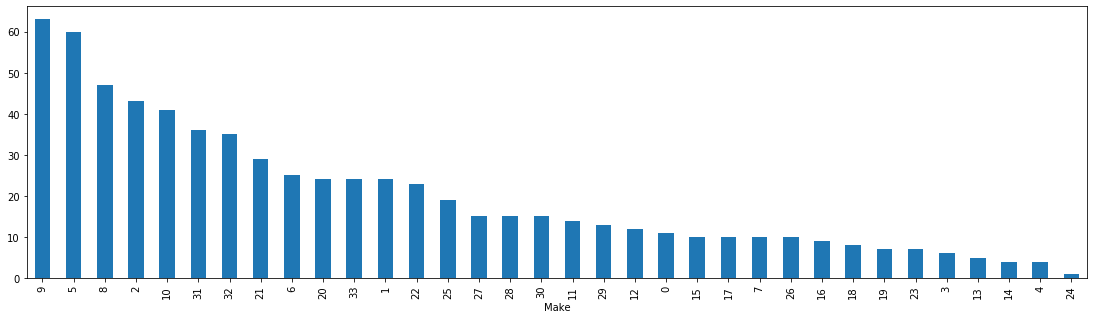

In [20]:
plt.figure(figsize=(19,5));

data.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")

### MODEL.1

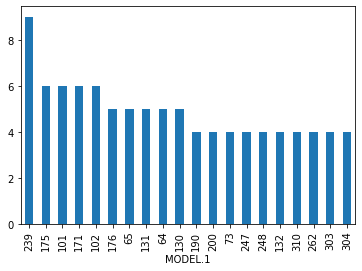

In [21]:
data.groupby("MODEL.1")["MODEL.1"].count().sort_values(ascending=False)[:20].plot(kind="bar")

### Vehicle Class

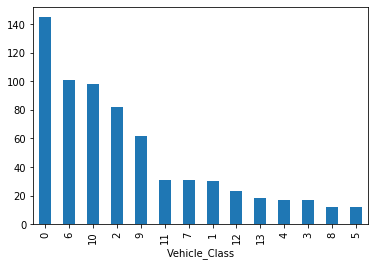

In [22]:
data.groupby('Vehicle_Class')['Vehicle_Class'].count().sort_values(ascending=False).plot(kind="bar")

### Transmission

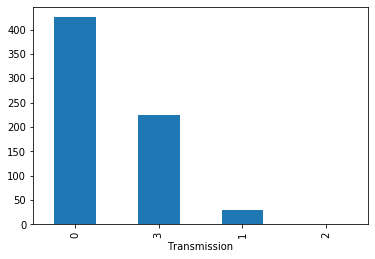

In [23]:
data.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar')

### Fuel_type

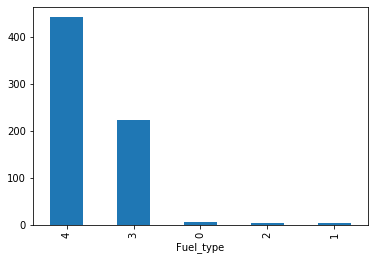

In [24]:
data.groupby('Fuel_type')["Fuel_type"].count().sort_values(ascending=False).plot(kind='bar')

### Make vs CO2_Emission

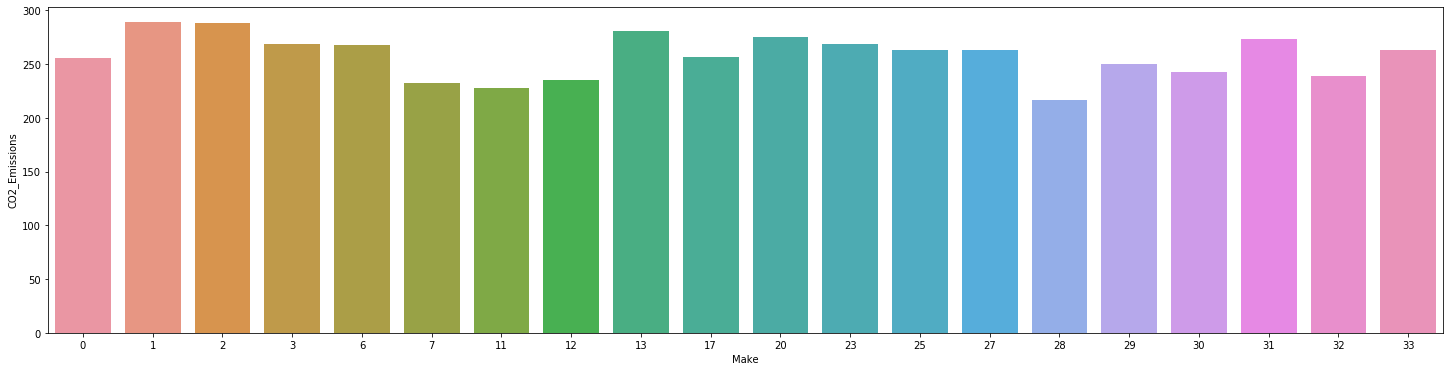

In [25]:
mco2 = data.groupby(['Make'])['CO2_Emissions'].mean().sort_values()[:20].reset_index()

plt.figure(figsize = (25, 6))

sns.barplot(x = "Make", y = "CO2_Emissions", data = mco2)

### Vehicle vs CO2_Emissions

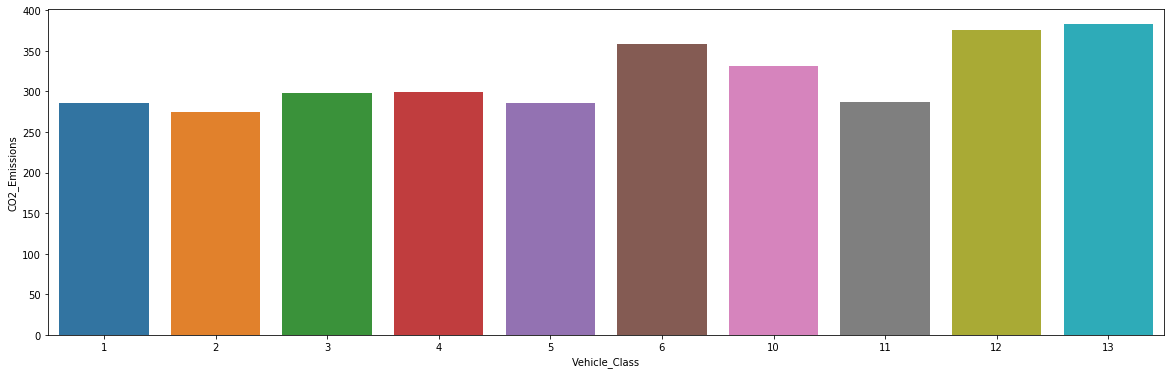

In [26]:
vc = data.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending = False)[:10].reset_index()

plt.figure(figsize = (20, 6))

sns.barplot(x = 'Vehicle_Class', y = 'CO2_Emissions', data = vc)

### Transmission vs CO2_Emissions

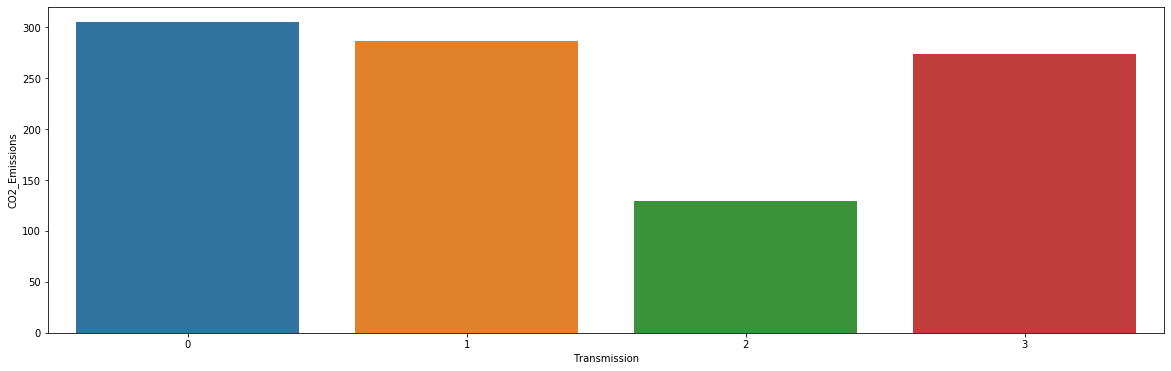

In [27]:
tc = data.groupby('Transmission')['CO2_Emissions'].mean().sort_values(ascending = False)[:10].reset_index()

plt.figure(figsize = (20,6))

sns.barplot(x = 'Transmission',y = 'CO2_Emissions',data = tc)

### Fuel_type vs CO2_Emission

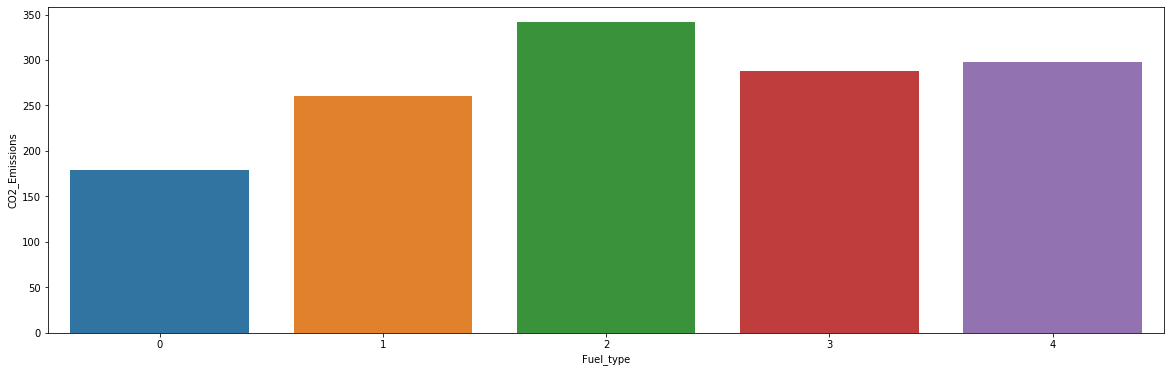

In [28]:
fc = data.groupby('Fuel_type')['CO2_Emissions'].mean().sort_values()[:10].reset_index()

plt.figure(figsize = (20,6))

sns.barplot(x = 'Fuel_type',y = 'CO2_Emissions',data = fc)

### Correlation between columns

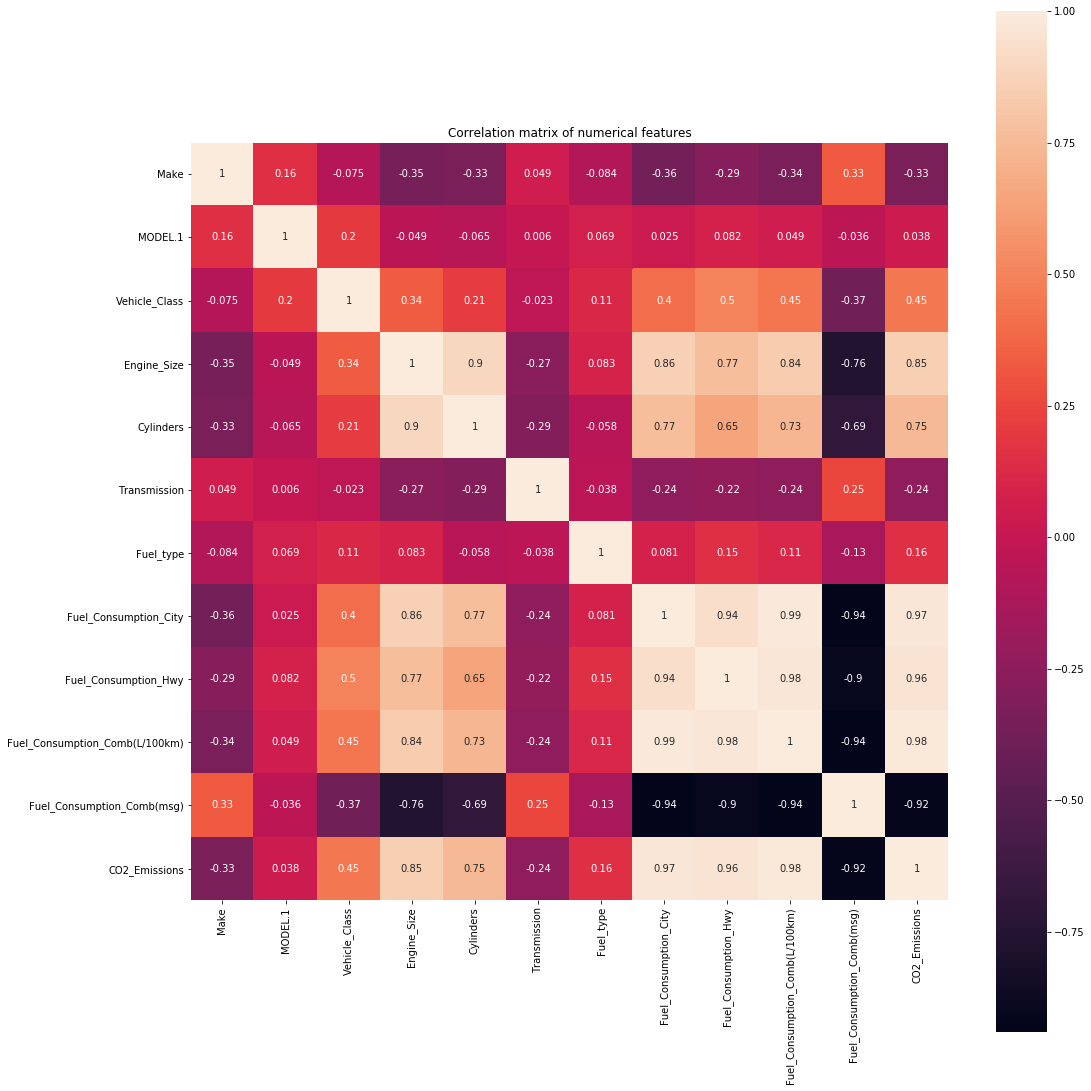

In [29]:
corr = data.corr()

plt.subplots(figsize = (16, 16))

sns.heatmap(corr, annot = True, square = True)

plt.title("Correlation matrix of numerical features")

plt.tight_layout()

plt.show()

### Correlation with Target Column

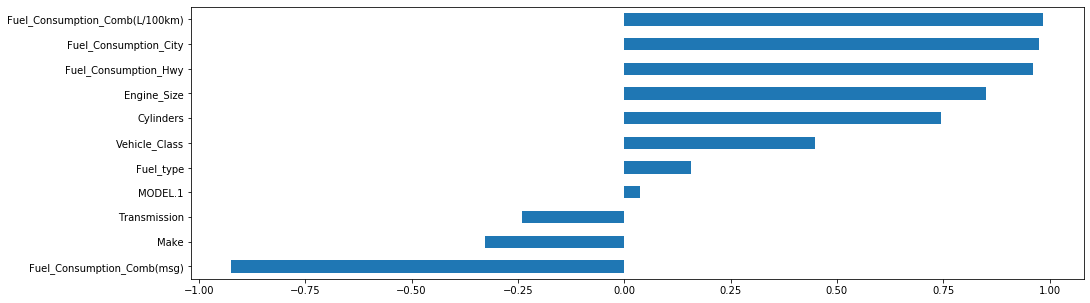

In [30]:
plt.figure(figsize = (16, 5))

corr["CO2_Emissions"].sort_values(ascending = True)[:-1].plot(kind = "barh")

## Splitting Train and Test Data

### Creating the Dependent and Independent variable

In [31]:
x = data.drop(['CO2_Emissions', 'Fuel_Consumption_Comb(L/100km)', 'MODEL.1'], axis = 1)

x = pd.DataFrame(x)

y = data['CO2_Emissions']

y = pd.DataFrame(y)

### Split into train and test data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(543, 9)
(136, 9)
(543, 1)
(136, 1)


## Building the Model

### Fit the data with linear regression

In [33]:
lr = LinearRegression()

lr = lr.fit(x_train, y_train)

### Predict the values

In [34]:
y_pred = lr.predict(x_test)

y_pred

array([[354.85171194],
       [268.4531707 ],
       [297.60466559],
       [193.3382349 ],
       [341.50860242],
       [343.92395653],
       [222.27378841],
       [294.07573247],
       [263.1368257 ],
       [209.03213488],
       [285.54329257],
       [277.82183883],
       [287.76554147],
       [428.15918777],
       [217.86410296],
       [343.0229313 ],
       [339.376677  ],
       [347.35915488],
       [232.63908778],
       [336.53765593],
       [256.38284942],
       [365.34981444],
       [348.4734845 ],
       [369.40493529],
       [240.17803987],
       [160.19361701],
       [266.35988375],
       [192.76228697],
       [298.09905274],
       [309.2563186 ],
       [389.16961768],
       [260.23251057],
       [263.66960713],
       [279.69974172],
       [282.36328082],
       [235.88174772],
       [269.37956017],
       [235.80954707],
       [397.71787918],
       [321.76032239],
       [297.18887096],
       [280.38247127],
       [199.73208844],
       [268

In [35]:
y_predict = lr.predict([[0, 0, 1.7, 4, 0, 4, 9.3, 7.2, 34]])

y_predict

array([[194.30811772]])

## Model Evaluation

#### MAE, MSE, RMSE

In [36]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  5.327868570518991
MSE:  260.82431344914227
RMSE:  16.150056143838704


# Save the Model

### Dumping the model

In [37]:
pickle.dump(lr, open("CO2.pkl", "wb"))

----------------------------------------------------------
--------------------------------------------------------------------